# Data Compression

In [3]:
import pandas as pd
import sys

sys.path.append('../')

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

df_wine = pd.read_csv(
    '../data/wine.data',
    header=None,
)
df_wine.columns = ['Class label', 'Alcohol',
   'Malic acid', 'Ash',
   'Alcalinity of ash', 'Magnesium',
   'Total phenols', 'Flavanoids',
   'Nonflavanoid phenols',
   'Proanthocyanins',
   'Color intensity', 'Hue',
   'OD280/OD315 of diluted wines',
   'Proline']
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Principal component analysis(PCA)

### Normalize data using standard nomral distribution

In [4]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
    stratify=y,
    random_state=0)

pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550.0
1,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235.0
2,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
3,13.51,1.80,2.65,19.0,110.0,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095.0
4,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0
120,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
121,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415.0
122,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0


In [5]:
# standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

pd.DataFrame(X_train_std)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.712259,2.220487,-0.130259,0.059629,-0.504327,-0.528316,-1.240000,0.841180,-1.052151,-0.292189,-0.200170,-0.821641,-0.629464
1,0.882292,-0.704572,1.175336,-0.090655,2.341479,1.016759,0.662995,1.088743,-0.492935,0.131521,1.339826,0.549313,1.475688
2,0.845856,-0.730230,1.175336,0.811048,0.135979,1.098079,1.163267,-0.644195,1.252496,0.258634,1.068062,0.130811,1.629349
3,0.578661,-0.473646,0.988823,-0.240939,0.776285,0.040922,0.457000,-0.644195,-0.170963,-0.376931,0.660416,0.361708,1.045438
4,-0.526554,0.090839,-0.689799,-0.391223,-0.362037,-1.146346,-1.377330,2.161513,-1.187719,0.851827,-1.015462,-1.499903,-0.183848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-1.158106,-1.046684,0.466585,1.261899,-1.500359,-0.528316,-0.474879,0.263534,-0.408206,-1.224349,1.611590,0.145242,-0.383607
120,0.445064,1.330995,0.354677,0.961331,0.207124,-0.853595,-1.289047,0.511097,-0.391260,0.936569,-1.151344,-1.528765,-0.014821
121,1.028035,2.297462,-0.577891,0.059629,-1.358069,-2.187238,-1.691226,0.263534,-1.628313,-0.080334,-1.694872,-1.860680,-1.044348
122,-1.303849,-1.080895,-0.316772,0.360196,0.135979,1.716108,0.074440,-1.964528,0.015443,-0.796403,0.162182,0.736917,0.403136


### Covariance Matrix and Eigenvalue
$$
\mathrm{Cov}(X_i, X_j) = \frac{1}{m-1} \sum_{k=1}^{m} (x_{ki} - \bar{x}_i)(x_{kj} - \bar{x}_j)
$$

In [6]:
import numpy as np

# assume the Xij is the Matrix
# the ith row is the ith sample
# the jth col is the jth sample of the feature

# covariance matrix[i][j] = 1/(N-1) * sigma( (X[i][n] - mu[i]) * (X[j][n] - mu[j] )
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# note that the eigen vector are the *columns* of eigen_vecs

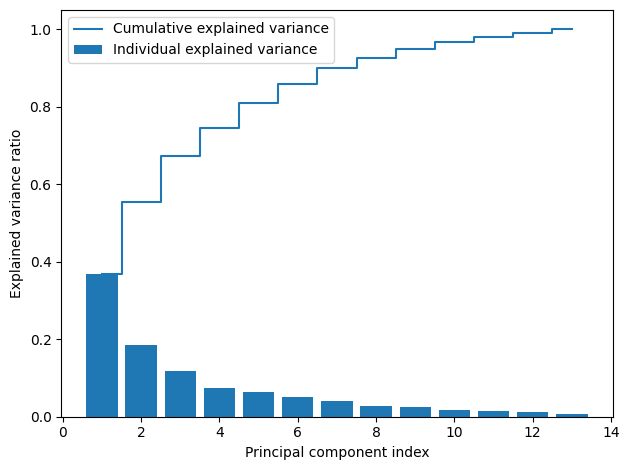

In [7]:
total = sum(eigen_vals)
var_exp = [(i / total) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, align='center', # the bar will be in the middle of the scale mark
    label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
    label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Feature transformation

In [8]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [9]:
# v = eigen_pairs[0][1]
# v[:, np.newaxis] transfer from shape(n,) => shape(n,1)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [10]:
X_train_pca = X_train_std.dot(w)

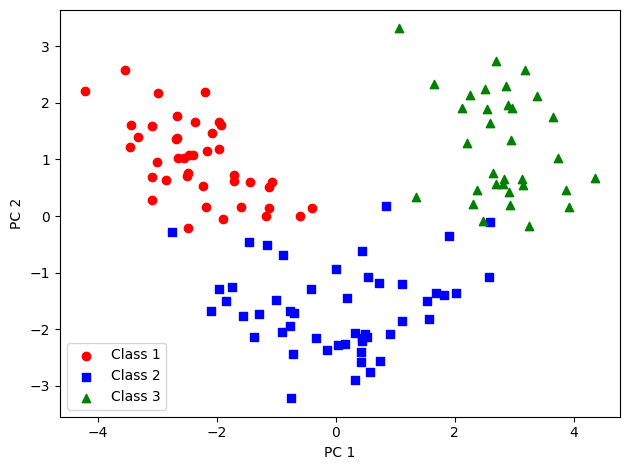

In [11]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], # the first component, i.e. X
                X_train_pca[y_train==l, 1], # the second component, i.e. Y
                c=c, # color
                label=f'Class {l}', marker=m # label
    )
plt.xlabel('PC 1') # principal component 1 
plt.ylabel('PC 2') # principal component 2
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


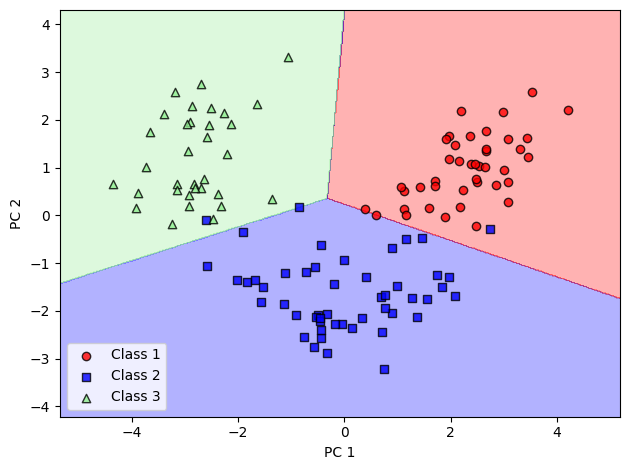

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from dlfc.plot import plot_decision_regions

# initializing the PCA transformer and
# logistic regression estimator:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', # one over rest
                        random_state=1, 
                        solver='lbfgs')

# dimensionality reduction:
# shape is (N, 2), N is number of samples
# PCA is transform from shape(N, d) => (N, 2)
X_train_pca = pca.fit_transform(X_train_std) 
X_test_pca = pca.transform(X_test_std)

# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

[[-3.02018404e-01  7.81895450e-01 -1.71410478e-01 -3.23153045e-03
   2.66625736e-01 -2.43366965e-01 -5.69117802e-02  2.16725465e-01
   2.22926311e-01 -3.09863159e-02  1.73135111e-01 -5.01053166e-02
   1.11777607e-01]
 [ 5.44089424e-01  2.56268630e-01  1.19646716e-01  5.51624618e-01
  -8.21439376e-02 -5.10202452e-01  1.97259514e-01  7.40373561e-03
  -6.18109097e-02  8.64628855e-03 -6.35004393e-02  3.16072748e-02
  -1.13451054e-01]
 [-5.60093818e-02  3.80140862e-01  8.43404129e-01 -1.06842283e-01
   1.47553427e-01 -3.16623058e-04 -9.52655986e-02 -1.04530631e-01
  -2.14039991e-01  4.68130063e-02  2.13315368e-01  6.58189138e-03
  -4.91376938e-02]
 [ 4.55408287e-01 -1.76464625e-01  7.77782099e-01  3.31562024e-02
  -4.73273183e-02  3.30218077e-02 -1.61261417e-01  2.59352653e-01
   1.36188668e-01 -4.27918609e-02 -1.93614837e-01 -4.34464567e-02
   8.48358888e-02]
 [-3.39701108e-01  4.50367349e-01  2.44065231e-01 -3.60311643e-01
  -6.20623565e-01 -5.35211676e-02  2.91761210e-01 -6.86463922e-02


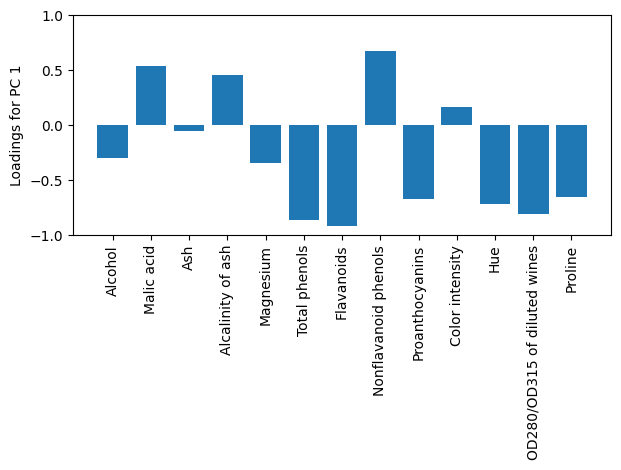

In [13]:
# this is column multiplication 
loadings = eigen_vecs * np.sqrt(eigen_vals)
print(loadings)

fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

### Using Sci-Learn's PCA

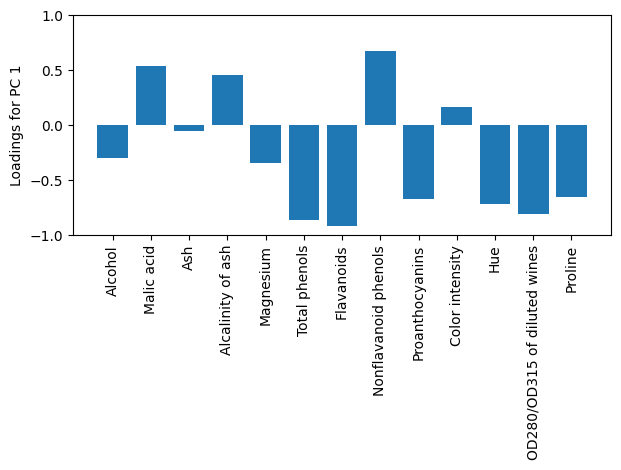

In [14]:
# check the explained variance ratio
# should be the same as the hands on version
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)

# note that in sklearn's pca, the components' shapes are (N, d) i.e. N samples and d features
# so transpose is needed here.
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots()
ax.bar(range(13), sklearn_loadings[:, 0]*-1, align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()

## Linear discriminant analysis(LDA)

### Step 1 Standardize the d-dimensional dataset (d is the number of features).

### Step 2 For each class, compute the d-dimensional mean vector.

In [15]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print(f'Mean Vector[{label}]: {mean_vecs[label - 1]}\n')

Mean Vector[1]: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

Mean Vector[2]: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

Mean Vector[3]: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



### Step 3 Construct the between-class scatter matrix $S_B$, and the within-class scatter matrix, $S_W$.
$$
S_B = \sum_{i=1}^{c} n_i (\mu_i - \mu)(\mu_i - \mu)^T
$$

$$
S_W = \sum_{i=1}^{c} \sum_{x \in D_i} (x - \mu_i)(x - \mu_i)^T
$$

In [16]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label,mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: '
    f'{S_W.shape[0]}x{S_W.shape[1]}')

Scaled within-class scatter matrix: 13x13


In [17]:
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1) # make column vector

d = 13 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # make column vector
    S_B += n * (mean_vec - mean_overall).dot(
    (mean_vec - mean_overall).T)

print('Between-class scatter matrix: '
    f'{S_B.shape[0]}x{S_B.shape[1]}')

Between-class scatter matrix: 13x13


### Step 4 Selecting linear discriminants for the new feature subspace

In [18]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

349.617808905994
172.76152218979382
2.5481445655158925e-14
2.5481445655158925e-14
2.338176411255993e-14
2.338176411255993e-14
1.4368252223521912e-14
1.4368252223521912e-14
6.3737818001526064e-15
4.514488639250919e-15
4.514488639250919e-15
2.5784328775550555e-16
0.0


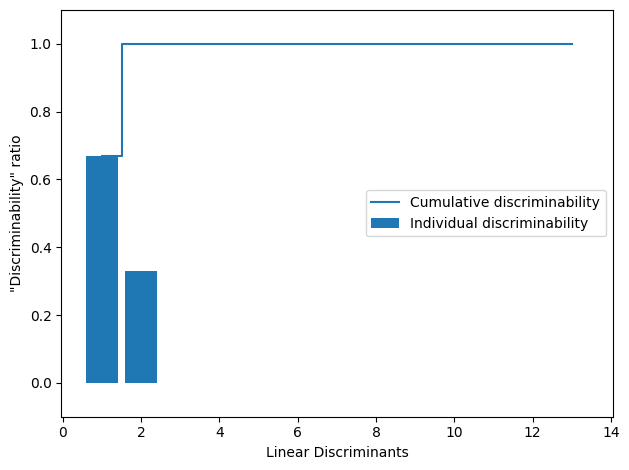

In [21]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
# bar function is used to plot the individual discriminability
# step function is used to plot the cumulative discriminability
plt.bar(range(1, 14), discr, align='center', label='Individual discriminability')
plt.step(range(1, 14), cum_discr, where='mid',label='Cumulative discriminability')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [24]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
               eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

# w1 is the same as w, but using reshape instead of np.newaxis
# reshape(-1, 1) is used to convert the vector to a column vector
# np.newaxis is used to add a new axis to the array
# both achieve the same result
# w1 = np.hstack((eigen_pairs[0][1].reshape(-1, 1).real,
#                eigen_pairs[1][1].reshape(-1, 1).real))

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


### Projecting examples onto the new feature space

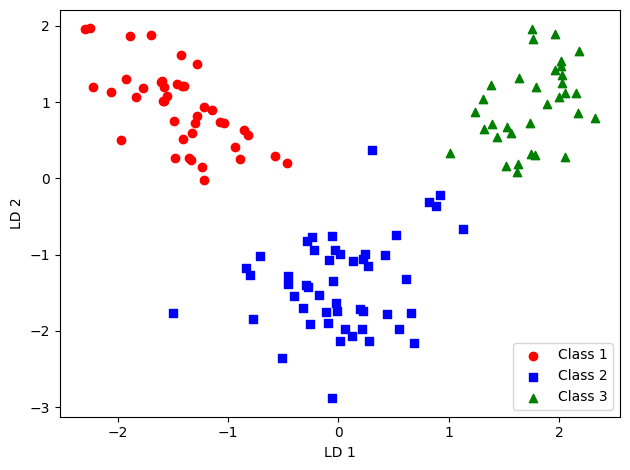

In [28]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
                X_train_lda[y_train==l, 1] * -1,
                c=c, label= f'Class {l}', marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### LDA via sklearn

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


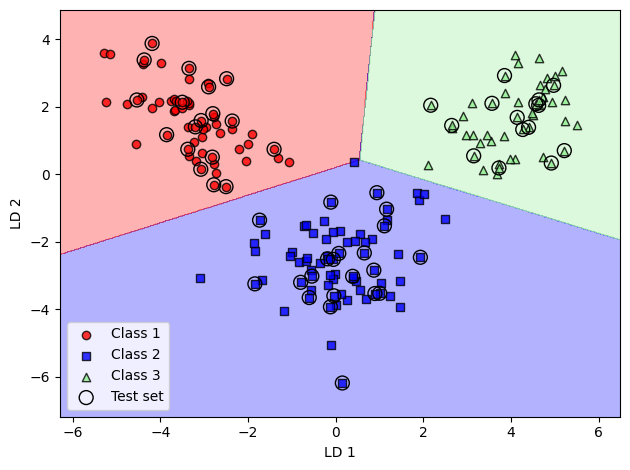

In [50]:
# the following import statement is one line
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(np.vstack((X_train_lda, X_test_lda)), 
                      np.hstack((y_train, y_test)), 
                      classifier=lr,
                      test_idx=range(len(y_train), len(y_train) + len(y_test)))

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()